<a href="https://colab.research.google.com/github/yhc-666/StyleTraceback/blob/main/bag_classifier/model_CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import files

In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Ultilization

In [ ]:
import cv2

In [ ]:
def ModifiedWay(rotateImage, angle):
    # Taking image height and width
    imgHeight, imgWidth = rotateImage.shape[0], rotateImage.shape[1]

    # Computing the centre x,y coordinates
    # of an image
    centreY, centreX = imgHeight // 2, imgWidth // 2

    # Computing 2D rotation Matrix to rotate an image
    rotationMatrix = cv2.getRotationMatrix2D((centreY, centreX), angle, 1.0)

    # Now will take out sin and cos values from rotationMatrix
    # Also used numpy absolute function to make positive value
    cosofRotationMatrix = np.abs(rotationMatrix[0][0])
    sinofRotationMatrix = np.abs(rotationMatrix[0][1])

    # Now will compute new height & width of
    # an image so that we can use it in
    # warpAffine function to prevent cropping of image sides
    newImageHeight = int((imgHeight * sinofRotationMatrix) +
                         (imgWidth * cosofRotationMatrix))
    newImageWidth = int((imgHeight * cosofRotationMatrix) +
                        (imgWidth * sinofRotationMatrix))

    # After computing the new height & width of an image
    # we also need to update the values of rotation matrix
    rotationMatrix[0][2] += (newImageWidth / 2) - centreX
    rotationMatrix[1][2] += (newImageHeight / 2) - centreY

    # Now, we will perform actual image rotation
    rotatingimage = cv2.warpAffine(
        rotateImage, rotationMatrix, (newImageWidth, newImageHeight),
        borderMode=cv2.BORDER_REPLICATE)

    return rotatingimage

### Loading DataSet

In [ ]:
def datasetInitialize(path, label):
  # new pkl file
  train_data = []
  label_data = []
  for i in range(len(path)):
  # with open(r"gdrive/My Drive/style trace back/training dataset/{}.pkl".format(label), 'wb') as file:
  #   for filename in os.listdir(path):
  #     imgpath = os.path.join(path, filename)
  #     img = Image.open(imgpath)
  #     img = img.resize((512, 512))  # L: greyscale mode   P: color mode
  #     img = np.array(img)  # pixel value range: from 0 to 1
  #     train_data.append(img)
  #   pickle.dump(train_data, file)
      for filename in os.listdir(path[i]):
        imgpath = os.path.join(path[i], filename)
        img = Image.open(imgpath)
        img = img.resize((128, 128))  # L: greyscale mode   P: color mode
        img = np.array(img).astype(np.float32)  # pixel value range: from 0 to 1
        train_data.append(img)
        label_data.append(i)

        # add more images
        # img_added = cv2.imread(imgpath)
        # img_added = cv2.cvtColor(img_added, cv2.COLOR_BGR2RGB)
        # img_added = cv2.resize(img_added, (128, 128), interpolation = cv2.INTER_AREA)
        # for j in (90, 180, 270):
        #   img_modified = ModifiedWay(img_added, j)
        #   train_data.append(np.array(img_modified))
        #   label_data.append(i)

  with open(r"gdrive/My Drive/style trace back/training dataset/mainDataSet.pkl", 'wb') as file:
      pickle.dump([label_data, train_data], file)

In [ ]:
def loadDataset(dataSetPath):
    with open(dataSetPath, 'rb') as file:
      label, data = pickle.load(file)
    return (np.array(label), np.array(data))

In [ ]:
path = ["gdrive/My Drive/style trace back/image/classified/Gucci_marmont", 
        "gdrive/My Drive/style trace back/image/classified/Gucci_bamboo",
        "gdrive/My Drive/style trace back/image/classified/Gucci_diana",
        "gdrive/My Drive/style trace back/image/classified/Gucci_dionysus",
        "gdrive/My Drive/style trace back/image/classified/Gucci_jackie",
        "gdrive/My Drive/style trace back/image/classified/Gucci_horsebit",
        "gdrive/My Drive/style trace back/image/classified/Gucci_sylvie",
        "gdrive/My Drive/style trace back/image/classified/Gucci_ophidia"]
dataSetPath = "gdrive/My Drive/style trace back/training dataset/mainDataSet.pkl"
label = {0:"Gucci_marmont", 1:"Gucci_bamboo", 2:"Gucci_diana", 3:"Gucci_dionysus", 4:"Gucci_jackie", 5:"Gucci_horsebit", 6:"Gucci_sylvie", 7:"Gucci_ophidia"}

In [ ]:
datasetInitialize(path, label)
training_label, training_data = loadDataset("gdrive/My Drive/style trace back/training dataset/mainDataSet.pkl")

In [ ]:
training_data.shape

(1133, 128, 128, 3)

In [ ]:
training_label.shape

(1133,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


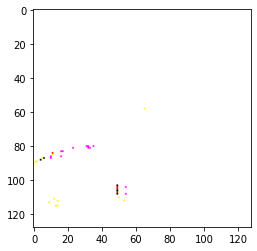

In [ ]:
plt.imshow(training_data[1])

### Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
training_data = training_data/255

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(training_data, training_label, test_size=0.2)

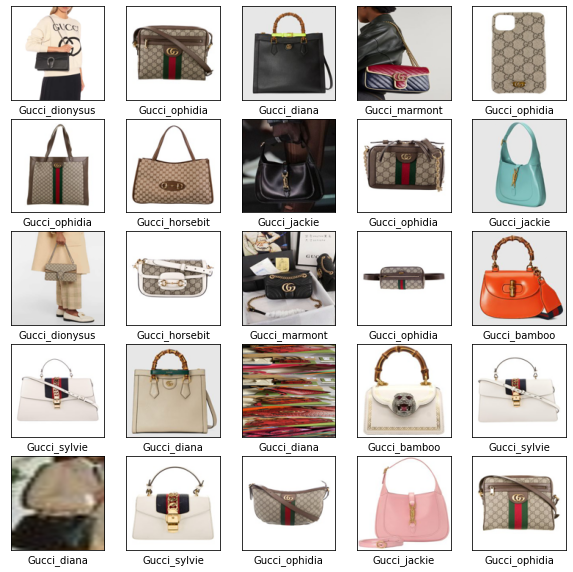

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i], cmap=plt.cm.binary)
    plt.xlabel(label[label_train[i]])
plt.show()

### Model Build-up

In [ ]:
import keras

In [ ]:
models = [keras.Sequential([
                          keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(5)
]),
keras.Sequential([
                          keras.layers.Conv2D(64, (3, 3), activation='softmax', input_shape=(128, 128, 3)),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='softmax'),
                          keras.layers.Dense(64, activation='softmax'),
                          keras.layers.Dense(5)
]),
keras.Sequential([
                          keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(5)
]),
keras.Sequential([
                          keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(5)
]),
keras.Sequential([
                          keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(5)
]),
]
result = []
for i in models:
  i.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  i.fit(data_train, label_train, epochs=10)
  test_loss, test_acc = i.evaluate(data_test,  label_test, verbose=2)
  result.append(test_acc)

print(result)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.001)
best_model = keras.Sequential([
                          keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Conv2D(64, (3, 3), activation='relu'),
                          keras.layers.MaxPooling2D((2, 2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dropout(0.1),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(8)
])
best_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
best_model.fit(data_train, label_train, epochs=10)
test_loss, test_acc = best_model.evaluate(data_test,  label_test, verbose=2)
print("\nTest Accuracy: ", test_acc)

Epoch 1/10
29/29 [==============================] - 19s 619ms/step - loss: 1.9928 - accuracy: 0.3322
Epoch 2/10
29/29 [==============================] - 18s 617ms/step - loss: 1.2346 - accuracy: 0.6038
Epoch 3/10
29/29 [==============================] - 17s 594ms/step - loss: 0.7894 - accuracy: 0.7406
Epoch 4/10
29/29 [==============================] - 18s 611ms/step - loss: 0.5882 - accuracy: 0.8190
Epoch 5/10
29/29 [==============================] - 18s 617ms/step - loss: 0.3955 - accuracy: 0.8808
Epoch 6/10
29/29 [==============================] - 18s 628ms/step - loss: 0.3217 - accuracy: 0.9051
Epoch 7/10
29/29 [==============================] - 18s 614ms/step - loss: 0.1767 - accuracy: 0.9492
Epoch 8/10
29/29 [==============================] - 18s 612ms/step - loss: 0.1175 - accuracy: 0.9647
Epoch 9/10
29/29 [==============================] - 18s 619ms/step - loss: 0.1132 - accuracy: 0.9724
Epoch 10/10
29/29 [==============================] - 18s 613ms/step - loss: 0.0922 - accura

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training

In [ ]:
model.fit(data_train, label_train, epochs=10)

Epoch 1/10
14/14 [==============================] - 7s 444ms/step - loss: 0.1404 - accuracy: 0.9721
Epoch 2/10
14/14 [==============================] - 6s 438ms/step - loss: 0.0735 - accuracy: 0.9930
Epoch 3/10
14/14 [==============================] - 6s 398ms/step - loss: 0.0500 - accuracy: 0.9907
Epoch 4/10
14/14 [==============================] - 6s 407ms/step - loss: 0.0385 - accuracy: 0.9953
Epoch 5/10
14/14 [==============================] - 6s 406ms/step - loss: 0.0320 - accuracy: 0.9953
Epoch 6/10
14/14 [==============================] - 6s 408ms/step - loss: 0.0284 - accuracy: 0.9953
Epoch 7/10
14/14 [==============================] - 6s 407ms/step - loss: 0.0201 - accuracy: 0.9953
Epoch 8/10
14/14 [==============================] - 6s 399ms/step - loss: 0.0371 - accuracy: 0.9977
Epoch 9/10
14/14 [==============================] - 6s 403ms/step - loss: 0.0179 - accuracy: 0.9977
Epoch 10/10
14/14 [==============================] - 6s 407ms/step - loss: 0.0214 - accuracy: 0.9977

In [ ]:
test_loss, test_acc = model.evaluate(data_test,  label_test, verbose=2)
print("\nTest Accuracy: ", test_acc)

4/4 - 0s - loss: 0.9699 - accuracy: 0.7222 - 392ms/epoch - 98ms/step

Test Accuracy:  0.7222222089767456


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(data_test)

#### Save Model

In [ ]:
import torch
model_name = "CNN 0.72"
torch.save(model, "gdrive/My Drive/style trace back/training model/{}".format(model_name))

INFO:tensorflow:Assets written to: ram://12a96e0b-f866-42af-869c-65dcb63c7e4a/assets
